In [1]:
import warnings, os
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(666) #just for reaptable results


In [111]:
stages = ['MP', 'Stage_0', 'Stage_I_II', 'Stage_III_IV', ]

In [112]:
LASSO = [np.nan, 0.65, np.nan,0.71]
RF = [np.nan, 0.73, np.nan,0.83]

In [113]:
res = []
for i in stages:
    df = pd.read_csv('./results/each_fold_performance_results_%s.csv' % i, index_col=0)
    m = df.groupby('fold')['ROC-AUC'].mean().mean()
    s = df.groupby('fold')['ROC-AUC'].mean().std()
    res.append([m,s])

In [114]:
df = pd.DataFrame(res,index = stages, columns = ['mean', 'std'])
df

,mean,std
MP,0.828045,0.071961
Stage_0,0.835171,0.080366
Stage_I_II,0.860916,0.033650
Stage_III_IV,0.894188,0.035850


(0.5, 1.0)

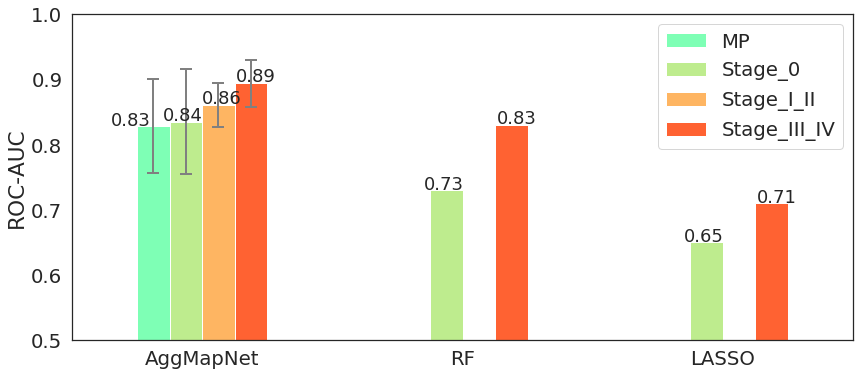

In [154]:
sns.set(style = 'white', font_scale=1.8)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6), sharex = True, sharey = True)

y1 = df['mean'].to_frame(name = 'AggMapNet')
y2 = pd.Series(RF, index =stages).to_frame(name = 'RF')
y3 = pd.Series(LASSO, index =stages).to_frame(name = 'LASSO')

y1_err = df['std'].to_frame(name = 'AggMapNet')
#y2_err = get_non_diag_mean(ourmodel_df)[1].to_frame(name = 'AggMapNet-STST')

y = y1 .join(y2).join(y3)
#y = y[['LASSO',  'RF', 'AggMapNet']]


y_err = y1_err.T #.join(y2_err)
y = y.T 

color = sns.color_palette("rainbow_r",15).as_hex() #PiYG
color = [color[7], color[5], color[3], color[1] ]

y.plot(kind = 'bar',ax = ax, color = color, yerr= y_err,ylim = (0.5, 0.96), error_kw=dict(ecolor='gray', lw=2, capsize=6, capthick=2))
ax.set_ylabel('ROC-AUC')
ax.set_xlabel('')


for x_, y_ in enumerate(y['MP'].values):
    ax.annotate('%.2f' % y_, xy = (x_-0.35, y_+0.002), fontsize =18)

for  x_, y_ in enumerate(y['Stage_0'].values):
    ax.annotate('%.2f' % y_, xy = (x_-0.15, y_+0.002), fontsize =18)
    
for  x_, y_ in enumerate(y['Stage_I_II'].values):
    ax.annotate('%.2f' % y_, xy = (x_, y_+0.002), fontsize =18)
        
for  x_, y_ in enumerate(y['Stage_III_IV'].values):
    ax.annotate('%.2f' % y_, xy = (x_+0.13, y_+0.002), fontsize =18)
    
ax.set_xticklabels(labels = y.index,rotation=0)
ax.set_ylim(0.5,1.0)
    
#fig.savefig('./CRC_performance_comparasion_mean.svg', bbox_inches='tight', dpi=400) 